<a href="https://colab.research.google.com/github/RafsanJany-44/High_Ram_NoteBook/blob/main/HighRam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from joblib import Parallel, delayed
from google.colab import files
import joblib
  

def save_model(model,model_name):
 joblib.dump(model, model_name)
  
def load_model(model_name):
  return joblib.load(model_name)

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research_5_Stages_Sleep_Classification_HMC/main/DATA/EEG_Five_Stages_HMC.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))

In [ ]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,W,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,W,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,W,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,W,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,W,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108451 entries, 0 to 108450
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sleep_Stage             108451 non-null  object 
 1   MeanP_Alpha_F4          108451 non-null  float64
 2   MedianF_Alpha_F4        108451 non-null  float64
 3   MeanF_Alpha_F4          108451 non-null  float64
 4   Spectral Edge_Alpha_F4  108451 non-null  float64
 5   PeakF_Alpha_F4          108451 non-null  float64
 6   MeanP_Beta_F4           108451 non-null  float64
 7   MedianF_Beta_F4         108451 non-null  float64
 8   MeanF_Beta_F4           108451 non-null  float64
 9   Spectral Edge_Beta_F4   108451 non-null  float64
 10  PeakF_Beta_F4           108451 non-null  float64
 11  MeanP_Theta_F4          108451 non-null  float64
 12  MedianF_Theta_F4        108451 non-null  float64
 13  MeanF_Theta_F4          108451 non-null  float64
 14  Spectral Edge_Theta_

In [ ]:
set(list(dataset[target]))

{'N1', 'N2', 'N3', 'R', 'W'}

In [ ]:
frequency = dataset["Sleep_Stage"].value_counts()
print(frequency)

N2    39428
N3    21290
W     19355
R     16465
N1    11913
Name: Sleep_Stage, dtype: int64


In [ ]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [ ]:
set(list(dataset[target])) # alphabet wise

{0, 1, 2, 3, 4}

In [ ]:
frequency = dataset["Sleep_Stage"].value_counts()
print(frequency)

1    39428
2    21290
4    19355
3    16465
0    11913
Name: Sleep_Stage, dtype: int64


In [ ]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
new_dataset=balance(X_test,y_test)

X_test = new_dataset.loc[:, new_dataset.columns!=target]
y_test = new_dataset[target]

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=10000
k_range = range (4500,N+1,500)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)'''

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nfrom tqdm import tqdm\nN=10000\nk_range = range (4500,N+1,500)\nscores={}\nscores_list = []\nfor k in tqdm(k_range):\n  classifier = RandomForestClassifier(n_estimators=k,random_state=0)\n  classifier.fit(X_train, y_train)\n  y_pred=classifier.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best n_estimators:")\nbest_estimator=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_estimator)'

  2%|▏         | 1/60 [00:55<55:01, 55.95s/it]

41/100 round completed......................... Accurecy: 0.7418578126980104


  3%|▎         | 2/60 [01:49<52:54, 54.73s/it]

42/100 round completed......................... Accurecy: 0.7422379926498542


  5%|▌         | 3/60 [02:43<51:33, 54.27s/it]

43/100 round completed......................... Accurecy: 0.7423647193004689


  7%|▋         | 4/60 [03:37<50:32, 54.15s/it]

44/100 round completed......................... Accurecy: 0.742009884678748


  8%|▊         | 5/60 [04:31<49:31, 54.02s/it]

45/100 round completed......................... Accurecy: 0.7419591940185021


 10%|█         | 6/60 [05:25<48:34, 53.97s/it]

46/100 round completed......................... Accurecy: 0.7417564313775187


 12%|█▏        | 7/60 [06:18<47:37, 53.91s/it]

47/100 round completed......................... Accurecy: 0.7414522874160436


 13%|█▎        | 8/60 [07:12<46:40, 53.86s/it]

48/100 round completed......................... Accurecy: 0.7414776327461665


 15%|█▌        | 9/60 [08:06<45:45, 53.84s/it]

49/100 round completed......................... Accurecy: 0.7420605753389938


 17%|█▋        | 10/60 [09:00<44:52, 53.85s/it]

50/100 round completed......................... Accurecy: 0.741984539348625


 18%|█▊        | 11/60 [09:54<43:57, 53.83s/it]

51/100 round completed......................... Accurecy: 0.741984539348625


 20%|██        | 12/60 [10:47<43:01, 53.77s/it]

52/100 round completed......................... Accurecy: 0.741984539348625


 22%|██▏       | 13/60 [11:41<42:07, 53.77s/it]

53/100 round completed......................... Accurecy: 0.741984539348625


 23%|██▎       | 14/60 [12:35<41:12, 53.75s/it]

54/100 round completed......................... Accurecy: 0.741984539348625


 25%|██▌       | 15/60 [13:29<40:25, 53.90s/it]

55/100 round completed......................... Accurecy: 0.741984539348625


 27%|██▋       | 16/60 [14:23<39:37, 54.03s/it]

56/100 round completed......................... Accurecy: 0.741984539348625


 28%|██▊       | 17/60 [15:18<38:47, 54.13s/it]

57/100 round completed......................... Accurecy: 0.741984539348625


 30%|███       | 18/60 [16:12<37:53, 54.14s/it]

58/100 round completed......................... Accurecy: 0.741984539348625


 32%|███▏      | 19/60 [17:06<36:57, 54.08s/it]

59/100 round completed......................... Accurecy: 0.741984539348625


 33%|███▎      | 20/60 [18:00<35:59, 53.99s/it]

60/100 round completed......................... Accurecy: 0.741984539348625


 35%|███▌      | 21/60 [18:53<35:03, 53.95s/it]

61/100 round completed......................... Accurecy: 0.741984539348625


 37%|███▋      | 22/60 [19:48<34:11, 53.98s/it]

62/100 round completed......................... Accurecy: 0.741984539348625


 38%|███▊      | 23/60 [20:42<33:18, 54.01s/it]

63/100 round completed......................... Accurecy: 0.741984539348625


 40%|████      | 24/60 [21:36<32:24, 54.02s/it]

64/100 round completed......................... Accurecy: 0.741984539348625


 42%|████▏     | 25/60 [22:30<31:33, 54.11s/it]

65/100 round completed......................... Accurecy: 0.741984539348625


 43%|████▎     | 26/60 [23:24<30:39, 54.10s/it]

66/100 round completed......................... Accurecy: 0.741984539348625


 45%|████▌     | 27/60 [24:18<29:44, 54.08s/it]

67/100 round completed......................... Accurecy: 0.741984539348625


 47%|████▋     | 28/60 [25:12<28:53, 54.17s/it]

68/100 round completed......................... Accurecy: 0.741984539348625


 48%|████▊     | 29/60 [26:07<27:58, 54.16s/it]

69/100 round completed......................... Accurecy: 0.741984539348625


 50%|█████     | 30/60 [27:01<27:05, 54.17s/it]

70/100 round completed......................... Accurecy: 0.741984539348625


 52%|█████▏    | 31/60 [27:55<26:12, 54.23s/it]

71/100 round completed......................... Accurecy: 0.741984539348625


 53%|█████▎    | 32/60 [28:49<25:18, 54.22s/it]

72/100 round completed......................... Accurecy: 0.741984539348625


 55%|█████▌    | 33/60 [29:44<24:24, 54.24s/it]

73/100 round completed......................... Accurecy: 0.741984539348625


 57%|█████▋    | 34/60 [30:38<23:30, 54.26s/it]

74/100 round completed......................... Accurecy: 0.741984539348625


 58%|█████▊    | 35/60 [31:32<22:37, 54.30s/it]

75/100 round completed......................... Accurecy: 0.741984539348625


 60%|██████    | 36/60 [32:27<21:42, 54.28s/it]

76/100 round completed......................... Accurecy: 0.741984539348625


 62%|██████▏   | 37/60 [33:21<20:47, 54.23s/it]

77/100 round completed......................... Accurecy: 0.741984539348625


 63%|██████▎   | 38/60 [34:15<19:50, 54.13s/it]

78/100 round completed......................... Accurecy: 0.741984539348625


 65%|██████▌   | 39/60 [35:09<18:55, 54.07s/it]

79/100 round completed......................... Accurecy: 0.741984539348625


 67%|██████▋   | 40/60 [36:02<18:00, 54.03s/it]

80/100 round completed......................... Accurecy: 0.741984539348625


 68%|██████▊   | 41/60 [36:56<17:05, 53.99s/it]

81/100 round completed......................... Accurecy: 0.741984539348625


 70%|███████   | 42/60 [37:50<16:11, 53.97s/it]

82/100 round completed......................... Accurecy: 0.741984539348625


 72%|███████▏  | 43/60 [38:44<15:16, 53.93s/it]

83/100 round completed......................... Accurecy: 0.741984539348625


 73%|███████▎  | 44/60 [39:38<14:22, 53.92s/it]

84/100 round completed......................... Accurecy: 0.741984539348625


 75%|███████▌  | 45/60 [40:32<13:28, 53.92s/it]

85/100 round completed......................... Accurecy: 0.741984539348625


 77%|███████▋  | 46/60 [41:26<12:34, 53.92s/it]

86/100 round completed......................... Accurecy: 0.741984539348625


 78%|███████▊  | 47/60 [42:20<11:41, 53.94s/it]

87/100 round completed......................... Accurecy: 0.741984539348625


 80%|████████  | 48/60 [43:14<10:48, 54.06s/it]

88/100 round completed......................... Accurecy: 0.741984539348625


 82%|████████▏ | 49/60 [44:08<09:54, 54.07s/it]

89/100 round completed......................... Accurecy: 0.741984539348625


 83%|████████▎ | 50/60 [45:03<09:01, 54.13s/it]

90/100 round completed......................... Accurecy: 0.741984539348625


 85%|████████▌ | 51/60 [45:57<08:07, 54.15s/it]

91/100 round completed......................... Accurecy: 0.741984539348625


 87%|████████▋ | 52/60 [46:51<07:13, 54.15s/it]

92/100 round completed......................... Accurecy: 0.741984539348625


 88%|████████▊ | 53/60 [47:45<06:19, 54.16s/it]

93/100 round completed......................... Accurecy: 0.741984539348625


 90%|█████████ | 54/60 [48:39<05:24, 54.16s/it]

94/100 round completed......................... Accurecy: 0.741984539348625


 92%|█████████▏| 55/60 [49:33<04:30, 54.11s/it]

95/100 round completed......................... Accurecy: 0.741984539348625


 93%|█████████▎| 56/60 [50:27<03:36, 54.11s/it]

96/100 round completed......................... Accurecy: 0.741984539348625


 95%|█████████▌| 57/60 [51:21<02:42, 54.12s/it]

97/100 round completed......................... Accurecy: 0.741984539348625


 97%|█████████▋| 58/60 [52:16<01:48, 54.13s/it]

98/100 round completed......................... Accurecy: 0.741984539348625


 98%|█████████▊| 59/60 [53:10<00:54, 54.14s/it]

99/100 round completed......................... Accurecy: 0.741984539348625


100%|██████████| 60/60 [54:04<00:00, 54.07s/it]

100/100 round completed......................... Accurecy: 0.741984539348625
The best Depth:
43


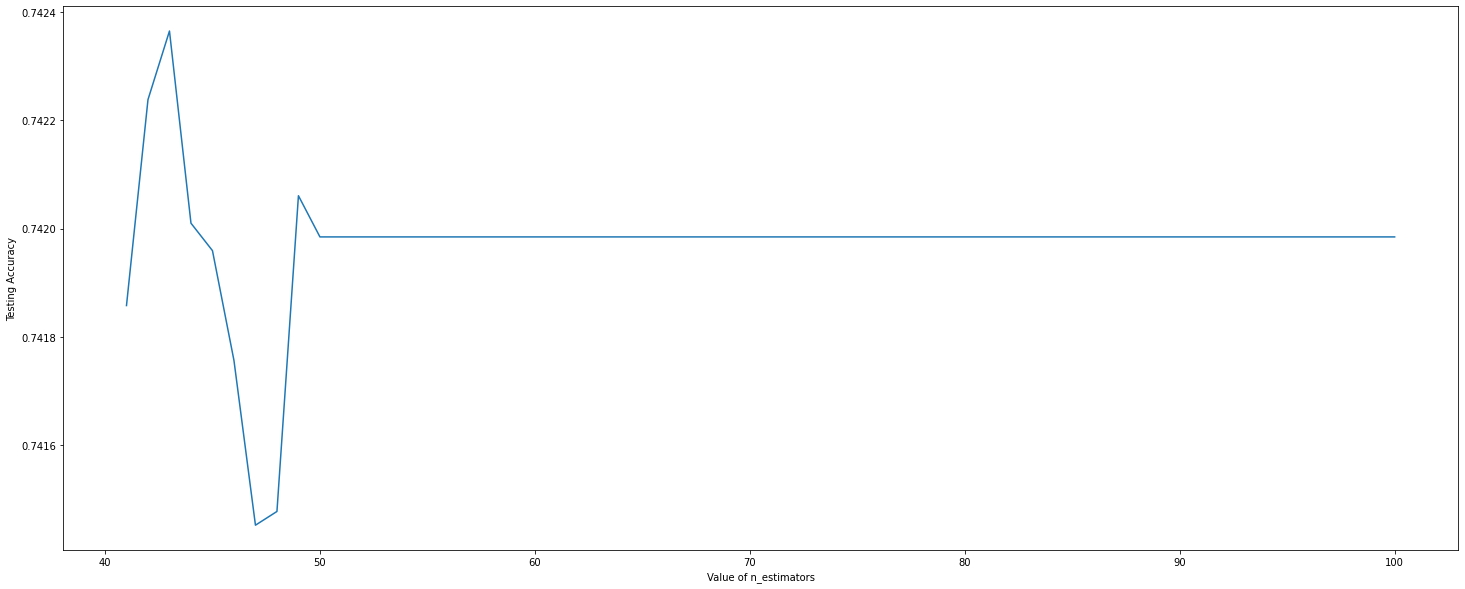

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=100
k_range = range (41,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

save_model(rf_estimator,"Best_est_"+str(rf_estimator))
#files.download("max_depth_"+str(rf_estimator)) '''

'from sklearn.ensemble import RandomForestClassifier\nrf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)\nrf_estimator.fit(X_train, y_train)\ny_pred=rf_estimator.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\n\nsave_model(rf_estimator,"Best_est_"+str(rf_estimator))\n#files.download("max_depth_"+str(rf_estimator)) '

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

save_model(rf_depth,"max_depth_"+str(rf_depth))
#files.download("max_depth_"+str(rf_depth)) 

[[2454 2512   26 1166 1733]
 [ 165 6784  456  279  207]
 [  13 1360 6465    3   50]
 [ 239 1008   44 6460  140]
 [ 369  317   16   62 7127]]
              precision    recall  f1-score   support

           0       0.76      0.31      0.44      7891
           1       0.57      0.86      0.68      7891
           2       0.92      0.82      0.87      7891
           3       0.81      0.82      0.81      7891
           4       0.77      0.90      0.83      7891

    accuracy                           0.74     39455
   macro avg       0.77      0.74      0.73     39455
weighted avg       0.77      0.74      0.73     39455

Accurecy:  0.7423647193004689


In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=450,max_depth=39,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

save_model(rf_all,"All_"+str(rf_all))
#files.download("max_depth_"+str(rf_all)) '''

'from sklearn.ensemble import RandomForestClassifier\nrf_all = RandomForestClassifier(n_estimators=450,max_depth=39,random_state=0)\nrf_all.fit(X_train, y_train)\ny_pred=rf_all.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\n\nsave_model(rf_all,"All_"+str(rf_all))\n#files.download("max_depth_"+str(rf_all)) '